In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import sys

In [3]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install fiona

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [6]:
le = preprocessing.LabelEncoder()
change_type_map = {'Demolition': 0, 'Road': 1, 'Residential': 2, 'Commercial': 3, 'Industrial': 4,
       'Mega Projects': 5}



In [7]:
df = gpd.read_file('/home/siddhesh/Desktop/Siddhesh/granule/kaggle task/train.geojson')

In [8]:
df

,index,change_type,change_status_date1,change_status_date2,change_status_date3,change_status_date4,change_status_date5,date1,date2,date3,date4,date5,urban_types,geography_types,geometry
0,0,Commercial,Land Cleared,Construction Midway,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Industrial,"River,Sparse Forest,Grass Land","POLYGON ((116.97563 38.89002, 116.97590 38.890..."
1,1,Commercial,Greenland,Greenland,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Sparse Urban,"Sparse Forest,Grass Land","POLYGON ((116.97500 38.88969, 116.97524 38.889..."
2,2,Commercial,Land Cleared,Land Cleared,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Sparse Urban,"Sparse Forest,Grass Land","POLYGON ((116.97519 38.88847, 116.97568 38.888..."
3,3,Commercial,Land Cleared,Land Cleared,Construction Midway,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Industrial,"River,Sparse Forest,Grass Land","POLYGON ((116.97630 38.89017, 116.97730 38.890..."
4,4,Commercial,Land Cleared,Land Cleared,Construction Started,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Industrial,"River,Sparse Forest,Grass Land","POLYGON ((116.97751 38.89037, 116.97854 38.890..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310001,310001,Residential,Prior Construction,Prior Construction,Prior Construction,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,01-05-2019,01-04-2020,Industrial,"Coastal,Dense Forest,Grass Land","POLYGON ((139.80642 35.60416, 139.80597 35.603..."
310002,310002,Residential,Land Cleared,Land Cleared,Land Cleared,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,01-05-2019,01-04-2020,Industrial,"Sparse Forest,Dense Forest","POLYGON ((139.80857 35.60407, 139.80831 35.603..."
310003,310003,Commercial,Materials Dumped,Land Cleared,Land Cleared,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,01-05-2019,01-04-2020,Industrial,"Sparse Forest,Dense Forest","POLYGON ((139.80927 35.60445, 139.80889 35.604..."
310004,310004,Commercial,Land Cleared,Land Cleared,Land Cleared,Greenland,Greenland,18-11-2014,01-03-2016,01-01-2018,01-05-2019,01-04-2020,Industrial,"River,Sparse Forest,Grass Land","POLYGON ((139.80688 35.60937, 139.80645 35.609..."


In [9]:
df_test = gpd.read_file('/home/siddhesh/Desktop/Siddhesh/granule/kaggle task/test.geojson')

In [10]:
df_test

,index,change_status_date1,change_status_date2,change_status_date3,change_status_date4,change_status_date5,date1,date2,date3,date4,date5,urban_types,geography_types,geometry
0,0,Prior Construction,Prior Construction,Land Cleared,Land Cleared,Land Cleared,20-11-2014,29-11-2015,16-05-2017,27-10-2018,19-03-2020,None,Barren Land,"POLYGON ((103.97404 36.01415, 103.97448 36.014..."
1,1,Prior Construction,Prior Construction,Land Cleared,Land Cleared,Land Cleared,20-11-2014,29-11-2015,16-05-2017,27-10-2018,19-03-2020,None,Barren Land,"POLYGON ((103.97465 36.01404, 103.97460 36.013..."
2,2,Prior Construction,Prior Construction,Land Cleared,Land Cleared,Land Cleared,20-11-2014,29-11-2015,16-05-2017,27-10-2018,19-03-2020,None,Barren Land,"POLYGON ((103.97492 36.01409, 103.97490 36.014..."
3,3,Prior Construction,Prior Construction,Land Cleared,Construction Done,Construction Done,20-11-2014,29-11-2015,16-05-2017,27-10-2018,19-03-2020,None,Barren Land,"POLYGON ((103.97448 36.01374, 103.97442 36.013..."
4,4,Land Cleared,Land Cleared,Land Cleared,Land Cleared,Land Cleared,20-11-2014,29-11-2015,16-05-2017,27-10-2018,19-03-2020,None,Barren Land,"POLYGON ((103.97462 36.01347, 103.97482 36.013..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121699,121699,Land Cleared,Land Cleared,Construction Done,Construction Done,Construction Done,30-07-2014,09-02-2015,02-03-2017,19-08-2018,22-01-2019,Sparse Urban,"Sparse Forest,Farms,Lakes","POLYGON ((113.21206 29.37929, 113.21213 29.379..."
121700,121700,Greenland,Construction Done,Construction Done,Construction Done,Construction Done,30-07-2014,09-02-2015,02-03-2017,19-08-2018,22-01-2019,Sparse Urban,"Sparse Forest,Grass Land,Lakes","POLYGON ((113.21203 29.37706, 113.21212 29.376..."
121701,121701,Greenland,Greenland,Greenland,Construction Midway,Construction Done,30-07-2014,09-02-2015,02-03-2017,19-08-2018,22-01-2019,Sparse Urban,"Sparse Forest,Grass Land,Lakes","POLYGON ((113.21187 29.37609, 113.21188 29.375..."
121702,121702,Land Cleared,Land Cleared,Construction Midway,Construction Done,Construction Done,30-07-2014,09-02-2015,02-03-2017,19-08-2018,22-01-2019,Sparse Urban,"Sparse Forest,Dense Forest","POLYGON ((113.21158 29.37573, 113.21162 29.375..."


In [11]:
df['geography_types']

0           River,Sparse Forest,Grass Land
1                 Sparse Forest,Grass Land
2                 Sparse Forest,Grass Land
3           River,Sparse Forest,Grass Land
4           River,Sparse Forest,Grass Land
                        ...               
310001     Coastal,Dense Forest,Grass Land
310002          Sparse Forest,Dense Forest
310003          Sparse Forest,Dense Forest
310004      River,Sparse Forest,Grass Land
310005    Coastal,Sparse Forest,Grass Land
Name: geography_types, Length: 310006, dtype: object

In [12]:
# df_test = gpd.read_file('../input/granular-ai-test-data/test.geojson')

In [13]:
# df_test

In [14]:
df['change_type']

0          Commercial
1          Commercial
2          Commercial
3          Commercial
4          Commercial
             ...     
310001    Residential
310002    Residential
310003     Commercial
310004     Commercial
310005     Commercial
Name: change_type, Length: 310006, dtype: object

In [15]:
# set(df_test['geography_types'])

In [16]:
df_geography = df['geography_types']

df_geography_single = []

#df_geography[0]
for i in range(len(df_geography)):
    df_geography_single.append(df_geography[i].split(",", 1)[0])

# x = txt.split(", ", 1)[0]


In [17]:
# df_urban = df['urban_types']

# df_urban_single = []
# for i in range(len(df_urban)):
#     df_urban_single.append(df_urban[i].split(",", 1)[0])

In [18]:
set(df_geography_single)

{'Barren Land',
 'Coastal',
 'Dense Forest',
 'Desert',
 'Farms',
 'Grass Land',
 'Hills',
 'Lakes',
 'None',
 'River',
 'Snow',
 'Sparse Forest'}

In [19]:
df_train = df

In [20]:
df_train['geography_types'] = df_geography_single
#df_train['urban_types'] = df_urban_single

In [21]:
df_train

,index,change_type,change_status_date1,change_status_date2,change_status_date3,change_status_date4,change_status_date5,date1,date2,date3,date4,date5,urban_types,geography_types,geometry
0,0,Commercial,Land Cleared,Construction Midway,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Industrial,River,"POLYGON ((116.97563 38.89002, 116.97590 38.890..."
1,1,Commercial,Greenland,Greenland,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Sparse Urban,Sparse Forest,"POLYGON ((116.97500 38.88969, 116.97524 38.889..."
2,2,Commercial,Land Cleared,Land Cleared,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Sparse Urban,Sparse Forest,"POLYGON ((116.97519 38.88847, 116.97568 38.888..."
3,3,Commercial,Land Cleared,Land Cleared,Construction Midway,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Industrial,River,"POLYGON ((116.97630 38.89017, 116.97730 38.890..."
4,4,Commercial,Land Cleared,Land Cleared,Construction Started,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Industrial,River,"POLYGON ((116.97751 38.89037, 116.97854 38.890..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310001,310001,Residential,Prior Construction,Prior Construction,Prior Construction,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,01-05-2019,01-04-2020,Industrial,Coastal,"POLYGON ((139.80642 35.60416, 139.80597 35.603..."
310002,310002,Residential,Land Cleared,Land Cleared,Land Cleared,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,01-05-2019,01-04-2020,Industrial,Sparse Forest,"POLYGON ((139.80857 35.60407, 139.80831 35.603..."
310003,310003,Commercial,Materials Dumped,Land Cleared,Land Cleared,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,01-05-2019,01-04-2020,Industrial,Sparse Forest,"POLYGON ((139.80927 35.60445, 139.80889 35.604..."
310004,310004,Commercial,Land Cleared,Land Cleared,Land Cleared,Greenland,Greenland,18-11-2014,01-03-2016,01-01-2018,01-05-2019,01-04-2020,Industrial,River,"POLYGON ((139.80688 35.60937, 139.80645 35.609..."


In [22]:
set(df_train['geography_types'])

{'Barren Land',
 'Coastal',
 'Dense Forest',
 'Desert',
 'Farms',
 'Grass Land',
 'Hills',
 'Lakes',
 'None',
 'River',
 'Snow',
 'Sparse Forest'}

In [23]:
set(df_train['urban_types'])

{'Dense Urban',
 'Dense Urban,Industrial',
 'Dense Urban,Urban Slum',
 'Industrial',
 'None',
 'Rural',
 'Rural,Industrial',
 'Sparse Urban',
 'Sparse Urban,Dense Urban',
 'Sparse Urban,Industrial',
 'Sparse Urban,Rural',
 'Sparse Urban,Urban Slum',
 'Sparse Urban,Urban Slum,Industrial',
 'Urban Slum',
 'Urban Slum,Industrial',
 'Urban Slum,Rural'}

In [24]:
df_train['geometry']

0         POLYGON ((116.97563 38.89002, 116.97590 38.890...
1         POLYGON ((116.97500 38.88969, 116.97524 38.889...
2         POLYGON ((116.97519 38.88847, 116.97568 38.888...
3         POLYGON ((116.97630 38.89017, 116.97730 38.890...
4         POLYGON ((116.97751 38.89037, 116.97854 38.890...
                                ...                        
310001    POLYGON ((139.80642 35.60416, 139.80597 35.603...
310002    POLYGON ((139.80857 35.60407, 139.80831 35.603...
310003    POLYGON ((139.80927 35.60445, 139.80889 35.604...
310004    POLYGON ((139.80688 35.60937, 139.80645 35.609...
310005    POLYGON ((139.80765 35.60978, 139.80725 35.609...
Name: geometry, Length: 310006, dtype: geometry

In [25]:
df_demo = df_train
# categorical_cols = ['urban_types', 'geography_types'] 
# le = LabelEncoder()

# # apply le on categorical feature columns
# df_demo[categorical_cols] = df_demo[categorical_cols].apply(lambda col: le.fit_transform(col))    
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()

# #One-hot-encode the categorical columns.
# #Unfortunately outputs an array instead of dataframe.
# array_hot_encoded = ohe.fit_transform(df_demo[categorical_cols])

# #Convert it to df
# data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df_demo.index)

# data_other_cols = df_demo.drop(columns=categorical_cols)

# #Concatenate the two dataframes : 
# data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

ohe = OneHotEncoder(sparse=False)
ohe.fit((df_demo['geography_types'].values.reshape(-1, 1)))


OneHotEncoder(sparse=False)

In [26]:
df_demo.columns

Index(['index', 'change_type', 'change_status_date1', 'change_status_date2',
       'change_status_date3', 'change_status_date4', 'change_status_date5',
       'date1', 'date2', 'date3', 'date4', 'date5', 'urban_types',
       'geography_types', 'geometry'],
      dtype='object')

In [27]:
set(df_demo['urban_types'])

{'Dense Urban',
 'Dense Urban,Industrial',
 'Dense Urban,Urban Slum',
 'Industrial',
 'None',
 'Rural',
 'Rural,Industrial',
 'Sparse Urban',
 'Sparse Urban,Dense Urban',
 'Sparse Urban,Industrial',
 'Sparse Urban,Rural',
 'Sparse Urban,Urban Slum',
 'Sparse Urban,Urban Slum,Industrial',
 'Urban Slum',
 'Urban Slum,Industrial',
 'Urban Slum,Rural'}

In [28]:
# TO IMPROVE EFFICIENCY, MAYBE?
# le = preprocessing.LabelEncoder()
# df_demo = df_demo.drop(['geometry'], axis=1)
# df_ohe = df_demo.apply(le.fit_transform)
# df_ohe.head(5)

In [29]:
# enc = preprocessing.OneHotEncoder()

# enc.fit(df_ohe)

# onehotlabels = enc.transform(df_ohe).toarray()
# onehotlabels.shape

In [30]:
# onehotlabels

In [31]:
def get_ohe(df):
    temp_df = pd.DataFrame(data=ohe.transform(df[['geography_types']]), columns=ohe.get_feature_names_out())
    df.drop(columns=['geography_types'], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    df
    return df

df_demo = get_ohe(df_demo)

/home/siddhesh/Desktop/Siddhesh/granule/jupyternb/jupyternb/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [32]:
df_demo

,index,change_type,change_status_date1,change_status_date2,change_status_date3,change_status_date4,change_status_date5,date1,date2,date3,...,x0_Dense Forest,x0_Desert,x0_Farms,x0_Grass Land,x0_Hills,x0_Lakes,x0_None,x0_River,x0_Snow,x0_Sparse Forest
0,0,Commercial,Land Cleared,Construction Midway,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,Commercial,Greenland,Greenland,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,Commercial,Land Cleared,Land Cleared,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,Commercial,Land Cleared,Land Cleared,Construction Midway,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,Commercial,Land Cleared,Land Cleared,Construction Started,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310001,310001,Residential,Prior Construction,Prior Construction,Prior Construction,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310002,310002,Residential,Land Cleared,Land Cleared,Land Cleared,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
310003,310003,Commercial,Materials Dumped,Land Cleared,Land Cleared,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
310004,310004,Commercial,Land Cleared,Land Cleared,Land Cleared,Greenland,Greenland,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
df_demo.columns

Index(['index', 'change_type', 'change_status_date1', 'change_status_date2',
       'change_status_date3', 'change_status_date4', 'change_status_date5',
       'date1', 'date2', 'date3', 'date4', 'date5', 'urban_types', 'geometry',
       'x0_Barren Land', 'x0_Coastal', 'x0_Dense Forest', 'x0_Desert',
       'x0_Farms', 'x0_Grass Land', 'x0_Hills', 'x0_Lakes', 'x0_None',
       'x0_River', 'x0_Snow', 'x0_Sparse Forest'],
      dtype='object')

In [34]:
ohe = OneHotEncoder(sparse=False)
ohe.fit((df_demo['urban_types'].values.reshape(-1, 1)))

def get_ohe(df):
    temp_df = pd.DataFrame(data=ohe.transform(df[['urban_types']]), columns=ohe.get_feature_names_out())
    df.drop(columns=['urban_types'], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    df
    return df

df_demo = get_ohe(df_demo)

/home/siddhesh/Desktop/Siddhesh/granule/jupyternb/jupyternb/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [35]:
df_demo

,index,change_type,change_status_date1,change_status_date2,change_status_date3,change_status_date4,change_status_date5,date1,date2,date3,...,"x0_Rural,Industrial",x0_Sparse Urban,"x0_Sparse Urban,Dense Urban","x0_Sparse Urban,Industrial","x0_Sparse Urban,Rural","x0_Sparse Urban,Urban Slum","x0_Sparse Urban,Urban Slum,Industrial",x0_Urban Slum,"x0_Urban Slum,Industrial","x0_Urban Slum,Rural"
0,0,Commercial,Land Cleared,Construction Midway,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Commercial,Greenland,Greenland,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Commercial,Land Cleared,Land Cleared,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Commercial,Land Cleared,Land Cleared,Construction Midway,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Commercial,Land Cleared,Land Cleared,Construction Started,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310001,310001,Residential,Prior Construction,Prior Construction,Prior Construction,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310002,310002,Residential,Land Cleared,Land Cleared,Land Cleared,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310003,310003,Commercial,Materials Dumped,Land Cleared,Land Cleared,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310004,310004,Commercial,Land Cleared,Land Cleared,Land Cleared,Greenland,Greenland,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df_demo.columns

Index(['index', 'change_type', 'change_status_date1', 'change_status_date2',
       'change_status_date3', 'change_status_date4', 'change_status_date5',
       'date1', 'date2', 'date3', 'date4', 'date5', 'geometry',
       'x0_Barren Land', 'x0_Coastal', 'x0_Dense Forest', 'x0_Desert',
       'x0_Farms', 'x0_Grass Land', 'x0_Hills', 'x0_Lakes', 'x0_None',
       'x0_River', 'x0_Snow', 'x0_Sparse Forest', 'x0_Dense Urban',
       'x0_Dense Urban,Industrial', 'x0_Dense Urban,Urban Slum',
       'x0_Industrial', 'x0_None', 'x0_Rural', 'x0_Rural,Industrial',
       'x0_Sparse Urban', 'x0_Sparse Urban,Dense Urban',
       'x0_Sparse Urban,Industrial', 'x0_Sparse Urban,Rural',
       'x0_Sparse Urban,Urban Slum', 'x0_Sparse Urban,Urban Slum,Industrial',
       'x0_Urban Slum', 'x0_Urban Slum,Industrial', 'x0_Urban Slum,Rural'],
      dtype='object')

In [37]:
# temp =[]
# for i in range(len(df_demo)):
#     if df_demo['change_type'][i] == 'Commercial':
#         temp.append(3)
#     elif df_demo['change_type'][i] == 'Demolition':
#         temp.append(0)
#     elif df_demo['change_type'][i] == 'Road':
#         temp.append(1)    
#     elif df_demo['change_type'][i] == 'Residential':
#         temp.append(2)
#     elif df_demo['change_type'][i] == 'Industrial':
#         temp.append(4)
#     else:
#         temp.append(5)
#     print(i)
# df_demo['change_type'] = temp
    
# 'Demolition': 0
# 'Road': 1
# 'Residential': 2
# 'Commercial': 3
# 'Industrial': 4
# 'Mega Projects': 5

In [38]:
len(df_demo)

310006

In [39]:
le = preprocessing.LabelEncoder()
le.fit(["Demolition", "Road", "Residential", "Commercial", "Industrial", "Mega Projects"])
list(le.classes_)

['Commercial',
 'Demolition',
 'Industrial',
 'Mega Projects',
 'Residential',
 'Road']

In [40]:
encoded_change = le.fit_transform(df_demo['change_type'])
# 'Demolition': 1
# 'Road': 5
# 'Residential': 4
# 'Commercial': 0
# 'Industrial': 2
# 'Mega Projects': 3

In [41]:
df_demo['change_type'] = encoded_change

In [42]:
df_demo

,index,change_type,change_status_date1,change_status_date2,change_status_date3,change_status_date4,change_status_date5,date1,date2,date3,...,"x0_Rural,Industrial",x0_Sparse Urban,"x0_Sparse Urban,Dense Urban","x0_Sparse Urban,Industrial","x0_Sparse Urban,Rural","x0_Sparse Urban,Urban Slum","x0_Sparse Urban,Urban Slum,Industrial",x0_Urban Slum,"x0_Urban Slum,Industrial","x0_Urban Slum,Rural"
0,0,0,Land Cleared,Construction Midway,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,Greenland,Greenland,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,Land Cleared,Land Cleared,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,Land Cleared,Land Cleared,Construction Midway,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,Land Cleared,Land Cleared,Construction Started,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310001,310001,4,Prior Construction,Prior Construction,Prior Construction,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310002,310002,4,Land Cleared,Land Cleared,Land Cleared,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310003,310003,0,Materials Dumped,Land Cleared,Land Cleared,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310004,310004,0,Land Cleared,Land Cleared,Land Cleared,Greenland,Greenland,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df_demo.columns

Index(['index', 'change_type', 'change_status_date1', 'change_status_date2',
       'change_status_date3', 'change_status_date4', 'change_status_date5',
       'date1', 'date2', 'date3', 'date4', 'date5', 'geometry',
       'x0_Barren Land', 'x0_Coastal', 'x0_Dense Forest', 'x0_Desert',
       'x0_Farms', 'x0_Grass Land', 'x0_Hills', 'x0_Lakes', 'x0_None',
       'x0_River', 'x0_Snow', 'x0_Sparse Forest', 'x0_Dense Urban',
       'x0_Dense Urban,Industrial', 'x0_Dense Urban,Urban Slum',
       'x0_Industrial', 'x0_None', 'x0_Rural', 'x0_Rural,Industrial',
       'x0_Sparse Urban', 'x0_Sparse Urban,Dense Urban',
       'x0_Sparse Urban,Industrial', 'x0_Sparse Urban,Rural',
       'x0_Sparse Urban,Urban Slum', 'x0_Sparse Urban,Urban Slum,Industrial',
       'x0_Urban Slum', 'x0_Urban Slum,Industrial', 'x0_Urban Slum,Rural'],
      dtype='object')

POLYGON ((116.97563423609992 38.890015408908404, 116.9759038351296 38.89005748985981, 116.97615757539283 38.890099570811216, 116.97652232702123 38.88788330737036, 116.97623686922509 38.887855253402755, 116.9759355526625 38.887855253402755, 116.97563423609992 38.890015408908404))


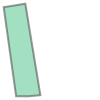

In [44]:
print(df_demo['geometry'][0]) #Why too many entries in one element
df_demo['geometry'][0]

In [45]:
df_demo['geometry'][0:10].area

/tmp/ipykernel_8346/2025509623.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_demo['geometry'][0:10].area


0    1.237159e-06
1    4.701495e-07
2    4.536881e-07
3    2.936349e-07
4    2.905206e-07
5    3.655977e-07
6    3.583680e-07
7    3.504710e-07
8    3.424628e-07
9    3.516945e-07
dtype: float64

In [46]:
df_demo['area'] = df_demo['geometry'].area

/tmp/ipykernel_8346/53841596.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_demo['area'] = df_demo['geometry'].area


In [47]:
# TO INCREASE ACCURACY, ADD DATES AND STATUS AFTER ONE HOT ENCODING
X = df_demo[['x0_Barren Land', 'x0_Coastal', 'x0_Dense Forest', 'x0_Desert',
       'x0_Farms', 'x0_Grass Land', 'x0_Hills', 'x0_Lakes', 'x0_None',
       'x0_River', 'x0_Snow', 'x0_Sparse Forest', 'x0_Dense Urban',
       'x0_Dense Urban,Industrial', 'x0_Dense Urban,Urban Slum',
       'x0_Industrial', 'x0_None', 'x0_Rural', 'x0_Rural,Industrial',
       'x0_Sparse Urban', 'x0_Sparse Urban,Dense Urban',
       'x0_Sparse Urban,Industrial', 'x0_Sparse Urban,Rural',
       'x0_Sparse Urban,Urban Slum', 'x0_Sparse Urban,Urban Slum,Industrial',
       'x0_Urban Slum', 'x0_Urban Slum,Industrial', 'x0_Urban Slum,Rural', 'area']]
y = df_demo['change_type']

In [48]:
len(X.columns)

31

In [49]:
y

0         0
1         0
2         0
3         0
4         0
         ..
310001    4
310002    4
310003    0
310004    0
310005    0
Name: change_type, Length: 310006, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
# predict_single = neigh.predict() pass the dataset here

In [53]:
X_test

,x0_Barren Land,x0_Coastal,x0_Dense Forest,x0_Desert,x0_Farms,x0_Grass Land,x0_Hills,x0_Lakes,x0_None,x0_None,...,x0_Sparse Urban,"x0_Sparse Urban,Dense Urban","x0_Sparse Urban,Industrial","x0_Sparse Urban,Rural","x0_Sparse Urban,Urban Slum","x0_Sparse Urban,Urban Slum,Industrial",x0_Urban Slum,"x0_Urban Slum,Industrial","x0_Urban Slum,Rural",area
13698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.520459e-09
63828,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.711745e-09
173930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.673569e-07
301176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.603711e-07
241427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.642246e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.970594e-08
78105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.802512e-09
12444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.993855e-08
295656,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.076205e-08


In [54]:
prediction_train = neigh.predict(X_test)

In [55]:
prediction_train

array([4, 0, 4, ..., 0, 0, 0])

In [56]:
from sklearn.metrics import precision_score, recall_score

p = precision_score(y_test.values, prediction_train, average = "micro")
r = recall_score(y_test.values, prediction_train, average="micro")

mean_f1_score = (2*(p*r))/(p+r)

In [57]:
mean_f1_score

0.4679087407870814

In [58]:
X_test.columns

Index(['x0_Barren Land', 'x0_Coastal', 'x0_Dense Forest', 'x0_Desert',
       'x0_Farms', 'x0_Grass Land', 'x0_Hills', 'x0_Lakes', 'x0_None',
       'x0_None', 'x0_River', 'x0_Snow', 'x0_Sparse Forest', 'x0_Dense Urban',
       'x0_Dense Urban,Industrial', 'x0_Dense Urban,Urban Slum',
       'x0_Industrial', 'x0_None', 'x0_None', 'x0_Rural',
       'x0_Rural,Industrial', 'x0_Sparse Urban', 'x0_Sparse Urban,Dense Urban',
       'x0_Sparse Urban,Industrial', 'x0_Sparse Urban,Rural',
       'x0_Sparse Urban,Urban Slum', 'x0_Sparse Urban,Urban Slum,Industrial',
       'x0_Urban Slum', 'x0_Urban Slum,Industrial', 'x0_Urban Slum,Rural',
       'area'],
      dtype='object')

In [67]:
#dumb = df_demo['geometry'].to_crs()
df_test['area'] = df_test['geometry'].area

/tmp/ipykernel_15507/3985692395.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_test['area'] = df_test['geometry'].area


In [68]:
import scipy
scipy.stats.pearsonr(df_demo['change_type'], df_demo['area'])

PearsonRResult(statistic=-0.03677105280062797, pvalue=3.2268529270535905e-93)

In [69]:
df_geography = df_test['geography_types']

df_geography_single = []

#df_geography[0]
for i in range(len(df_geography)):
    df_geography_single.append(df_geography[i].split(",", 1)[0])

In [70]:
# df_urban = df_test['urban_types']

# df_urban_single = []
# for i in range(len(df_urban)):
#     df_urban_single.append(df_urban[i].split(",", 1)[0])

In [71]:
df_test['geography_types'] = df_geography_single
#df_test['urban_types'] = df_urban_single

In [72]:
temp = df_test

In [73]:
df_test

,index,change_status_date1,change_status_date2,change_status_date3,change_status_date4,change_status_date5,date1,date2,date3,date4,date5,urban_types,geography_types,geometry,area
0,0,Prior Construction,Prior Construction,Land Cleared,Land Cleared,Land Cleared,20-11-2014,29-11-2015,16-05-2017,27-10-2018,19-03-2020,None,Barren Land,"POLYGON ((103.97404 36.01415, 103.97448 36.014...",5.589622e-08
1,1,Prior Construction,Prior Construction,Land Cleared,Land Cleared,Land Cleared,20-11-2014,29-11-2015,16-05-2017,27-10-2018,19-03-2020,None,Barren Land,"POLYGON ((103.97465 36.01404, 103.97460 36.013...",1.425909e-07
2,2,Prior Construction,Prior Construction,Land Cleared,Land Cleared,Land Cleared,20-11-2014,29-11-2015,16-05-2017,27-10-2018,19-03-2020,None,Barren Land,"POLYGON ((103.97492 36.01409, 103.97490 36.014...",4.833666e-08
3,3,Prior Construction,Prior Construction,Land Cleared,Construction Done,Construction Done,20-11-2014,29-11-2015,16-05-2017,27-10-2018,19-03-2020,None,Barren Land,"POLYGON ((103.97448 36.01374, 103.97442 36.013...",8.068710e-08
4,4,Land Cleared,Land Cleared,Land Cleared,Land Cleared,Land Cleared,20-11-2014,29-11-2015,16-05-2017,27-10-2018,19-03-2020,None,Barren Land,"POLYGON ((103.97462 36.01347, 103.97482 36.013...",7.172681e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121699,121699,Land Cleared,Land Cleared,Construction Done,Construction Done,Construction Done,30-07-2014,09-02-2015,02-03-2017,19-08-2018,22-01-2019,Sparse Urban,Sparse Forest,"POLYGON ((113.21206 29.37929, 113.21213 29.379...",1.468961e-08
121700,121700,Greenland,Construction Done,Construction Done,Construction Done,Construction Done,30-07-2014,09-02-2015,02-03-2017,19-08-2018,22-01-2019,Sparse Urban,Sparse Forest,"POLYGON ((113.21203 29.37706, 113.21212 29.376...",2.950373e-08
121701,121701,Greenland,Greenland,Greenland,Construction Midway,Construction Done,30-07-2014,09-02-2015,02-03-2017,19-08-2018,22-01-2019,Sparse Urban,Sparse Forest,"POLYGON ((113.21187 29.37609, 113.21188 29.375...",3.579027e-08
121702,121702,Land Cleared,Land Cleared,Construction Midway,Construction Done,Construction Done,30-07-2014,09-02-2015,02-03-2017,19-08-2018,22-01-2019,Sparse Urban,Sparse Forest,"POLYGON ((113.21158 29.37573, 113.21162 29.375...",2.281689e-08


In [74]:
ohe = OneHotEncoder(sparse=False)
ohe.fit((df_test['geography_types'].values.reshape(-1, 1)))

def get_ohe(df_test):
    temp_df = pd.DataFrame(data=ohe.transform(df_test[['geography_types']]), columns=ohe.get_feature_names_out())
    df_test.drop(columns=['geography_types'], axis=1, inplace=True)
    df_test = pd.concat([df_test.reset_index(drop=True), temp_df], axis=1)
    return df_test

df_test = get_ohe(df_test)

/home/siddhesh/Desktop/Siddhesh/granule/jupyternb/jupyternb/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [75]:
ohe = OneHotEncoder(sparse=False)
ohe.fit((df_test['urban_types'].values.reshape(-1, 1)))

def get_ohe(df_test):
    temp_df = pd.DataFrame(data=ohe.transform(df_test[['urban_types']]), columns=ohe.get_feature_names_out())
    df_test.drop(columns=['urban_types'], axis=1, inplace=True)
    df_test = pd.concat([df_test.reset_index(drop=True), temp_df], axis=1)
    return df_test

df_test = get_ohe(df_test)

/home/siddhesh/Desktop/Siddhesh/granule/jupyternb/jupyternb/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [76]:
temp = df_test

In [77]:
df_test.columns

Index(['index', 'change_status_date1', 'change_status_date2',
       'change_status_date3', 'change_status_date4', 'change_status_date5',
       'date1', 'date2', 'date3', 'date4', 'date5', 'geometry', 'area',
       'x0_Barren Land', 'x0_Coastal', 'x0_Dense Forest', 'x0_Desert',
       'x0_Farms', 'x0_Grass Land', 'x0_Hills', 'x0_Lakes', 'x0_None',
       'x0_River', 'x0_Sparse Forest', 'x0_Dense Urban',
       'x0_Dense Urban,Industrial', 'x0_Dense Urban,Rural',
       'x0_Dense Urban,Urban Slum', 'x0_Industrial', 'x0_None', 'x0_Rural',
       'x0_Rural,Industrial', 'x0_Sparse Urban', 'x0_Sparse Urban,Dense Urban',
       'x0_Sparse Urban,Industrial', 'x0_Sparse Urban,Rural',
       'x0_Sparse Urban,Urban Slum', 'x0_Urban Slum',
       'x0_Urban Slum,Industrial', 'x0_Urban Slum,Rural'],
      dtype='object')

In [78]:
len(df_test)

121704

In [79]:
temp_list = [0] * 121704

In [80]:
df_test['x0_Snow'] = temp_list

In [81]:
df_test['x0_Sparse Urban,Urban Slum,Industrial'] = temp_list

In [82]:
X_final_test = df_test[['x0_Barren Land', 'x0_Coastal', 'x0_Dense Forest', 'x0_Desert',
       'x0_Farms', 'x0_Grass Land', 'x0_Hills', 'x0_Lakes', 'x0_None',
       'x0_River', 'x0_Snow', 'x0_Sparse Forest', 'x0_Dense Urban',
       'x0_Dense Urban,Industrial', 'x0_Dense Urban,Urban Slum',
       'x0_Industrial', 'x0_None', 'x0_Rural', 'x0_Rural,Industrial',
       'x0_Sparse Urban', 'x0_Sparse Urban,Dense Urban',
       'x0_Sparse Urban,Industrial', 'x0_Sparse Urban,Rural',
       'x0_Sparse Urban,Urban Slum', 'x0_Sparse Urban,Urban Slum,Industrial',
       'x0_Urban Slum', 'x0_Urban Slum,Industrial', 'x0_Urban Slum,Rural', 'area']]

In [83]:
final_test = neigh.predict(X_final_test)

In [84]:
len(X_final_test)

121704

In [85]:
len(final_test)

121704

In [86]:
len(df_test)

121704

In [87]:
final_test

array([4, 0, 4, ..., 0, 4, 4])

In [88]:
# 'Demolition': 1
# 'Road': 5
# 'Residential': 4
# 'Commercial': 0
# 'Industrial': 2
# 'Mega Projects': 3

# Original

# 'Demolition': 0
# 'Road': 1
# 'Residential': 2
# 'Commercial': 3
# 'Industrial': 4
# 'Mega Projects': 5

In [89]:
submission_list = []
for i in range(len(final_test)):
    if final_test[i] == 0:
        submission_list.append(3)
    elif final_test[i] == 1:
        submission_list.append(0)
    elif final_test[i] == 2:
        submission_list.append(4)
    elif final_test[i] == 3:
        submission_list.append(5)
    elif final_test[i] == 4:
        submission_list.append(2)
    else:
        submission_list.append(1)
        

In [90]:
final_submission = pd.DataFrame(columns = ['Id', 'change_type'])

In [91]:
final_submission['change_type'] = submission_list

In [93]:
for i in range(len(submission_list)):
    final_submission['Id'][i] = i

/tmp/ipykernel_15507/1355622320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_submission['Id'][i] = i


In [94]:
final_submission.to_csv("/home/siddhesh/Desktop/Siddhesh/granule/kaggle task/final_2.csv",index=False)

In [95]:
df_demo

,index,change_type,change_status_date1,change_status_date2,change_status_date3,change_status_date4,change_status_date5,date1,date2,date3,...,x0_Sparse Urban,"x0_Sparse Urban,Dense Urban","x0_Sparse Urban,Industrial","x0_Sparse Urban,Rural","x0_Sparse Urban,Urban Slum","x0_Sparse Urban,Urban Slum,Industrial",x0_Urban Slum,"x0_Urban Slum,Industrial","x0_Urban Slum,Rural",area
0,0,0,Land Cleared,Construction Midway,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.237159e-06
1,1,0,Greenland,Greenland,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.701495e-07
2,2,0,Land Cleared,Land Cleared,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.536881e-07
3,3,0,Land Cleared,Land Cleared,Construction Midway,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.936349e-07
4,4,0,Land Cleared,Land Cleared,Construction Started,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.905206e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310001,310001,4,Prior Construction,Prior Construction,Prior Construction,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.428818e-07
310002,310002,4,Land Cleared,Land Cleared,Land Cleared,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.767191e-08
310003,310003,0,Materials Dumped,Land Cleared,Land Cleared,Land Cleared,Construction Done,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.923550e-08
310004,310004,0,Land Cleared,Land Cleared,Land Cleared,Greenland,Greenland,18-11-2014,01-03-2016,01-01-2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.931494e-08


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_demo[['x0_Barren Land', 'x0_Coastal', 'x0_Dense Forest', 'x0_Desert',
       'x0_Farms', 'x0_Grass Land', 'x0_Hills', 'x0_Lakes', 'x0_None',
       'x0_River', 'x0_Snow', 'x0_Sparse Forest', 'x0_Dense Urban',
       'x0_Dense Urban,Industrial', 'x0_Dense Urban,Urban Slum',
       'x0_Industrial', 'x0_None', 'x0_Rural', 'x0_Rural,Industrial',
       'x0_Sparse Urban', 'x0_Sparse Urban,Dense Urban',
       'x0_Sparse Urban,Industrial', 'x0_Sparse Urban,Rural',
       'x0_Sparse Urban,Urban Slum', 'x0_Sparse Urban,Urban Slum,Industrial',
       'x0_Urban Slum', 'x0_Urban Slum,Industrial', 'x0_Urban Slum,Rural', 'area']])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf['true_category'] = df_demo['change_type']

In [ ]:
plt.figure()
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4: 'black', 5: 'orange'}
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['true_category'])